In [2]:
!pip install mediapipe

  Using cached mediapipe-0.10.0-cp310-cp310-win_amd64.whl (50.2 MB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\anaconda3\\envs\\segmentation\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
# Import Packages
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
import mediapipe as mp
import numpy as np

ModuleNotFoundError: No module named 'mediapipe'

##### 1. Setting Up Capture From Video 

In [5]:
cap = cv2.VideoCapture("C:/Users/dell/Downloads/Image/Squat_Video.mp4")

In [6]:
# Grab a Frame from Video
ret, frame = cap.read()

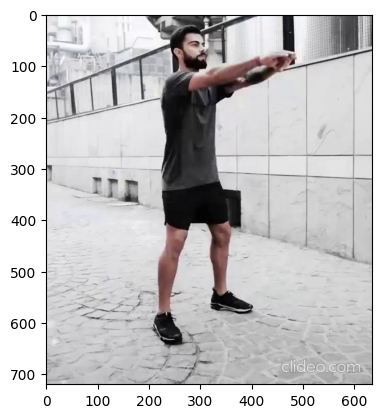

In [7]:
# Render Frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
cap.release()

In [9]:
cap = cv2.VideoCapture("C:/Users/dell/Downloads/Image/Squat_Video.mp4")

# setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        
        # BGR to RGB Transform
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detection
        results = pose.process(image)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render Detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(0,0,255),thickness=2,circle_radius=3),
                                 mp_drawing.DrawingSpec(color=(255,255,255),thickness=2,circle_radius=3))
        
        cv2.imshow("Video Player", image)
        
        k = cv2.waitKey(1) & 0xFF
        if k == ord('q') or k == 27:
            break
cap.release()
cv2.destroyAllWindows()

NameError: name 'mp_pose' is not defined

##### Squats Counter 

In [10]:
# Landmarks
left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

NameError: name 'landmarks' is not defined

In [11]:
left_hip, left_knee, left_ankle

NameError: name 'left_hip' is not defined

In [ ]:
def calculate_angle(a, b, c):
    a = np.array(a)    # First
    b = np.array(b)    # Mid
    c = np.array(c)    # End
    
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    # radians to degree
    angle = np.abs(radians * 180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
    return angle

In [ ]:
calculate_angle(left_hip, left_knee, left_ankle)

In [ ]:
cap = cv2.VideoCapture("E:/OpenCV/Squat_Video.mp4")

In [ ]:
counter = 0
instance = None

In [ ]:
# setup mediapipe instance
with mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as pose:
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        
        # BGR to RGB Transform
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detection
        results = pose.process(image)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            
            # Calculate Angle
            angle = calculate_angle(left_hip, left_knee, left_ankle)
            
            cv2.putText(image, str(angle),
                       tuple(np.multiply(left_knee, [720,634]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            print("New Angle", angle)
            if angle > 160:
                instance = "Up"
            if angle < 70 and instance == "Up":
                instance = "Down"
                counter += 1
                print(counter)
        except:
            pass
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
       
        cv2.putText(image, str(counter), (5,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        cv2.putText(image, instance, (60,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        # Render Detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(0,0,255),thickness=2,circle_radius=3),
                                 mp_drawing.DrawingSpec(color=(255,255,255),thickness=2,circle_radius=3))
        
        cv2.imshow("Video Player", image)
        
        k = cv2.waitKey(25) & 0xFF
        if k == ord('q') or k == 27:
            break
cap.release()
cv2.destroyAllWindows()